In [1]:
import numpy
import scipy.linalg
import matplotlib.pylab as plt
import math

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def calc_energy(n, m):
    main_part = ((n / Lx) ** 2) + ((m / Ly) ** 2)
    return (math.pi ** 2) * main_part

In [3]:
def calc_psi(x, y, n , m):
    part1 = math.sqrt(4 / (Lx * Ly))
    A = math.pi * n / Lx
    B = math.pi * m / Ly
    return part1 * numpy.cos(A * x) * numpy.cos(B * y)

In [4]:
Lx = 1
Ly = 1
Nx = 50
Ny = 50
h_y = Ly/(Ny - 1)
h_x = Lx/(Nx - 1)

In [5]:
x = numpy.linspace(-Lx/2, Lx/2, Nx)
y = numpy.linspace(-Ly/2, Ly/2, Ny)

In [6]:
x[1] - x[0]

0.020408163265306145

In [7]:
h_x

0.02040816326530612

In [8]:
x_grid, y_grid = numpy.meshgrid(x, y)
true_psi_grid = calc_psi(x_grid, y_grid, 1, 1)

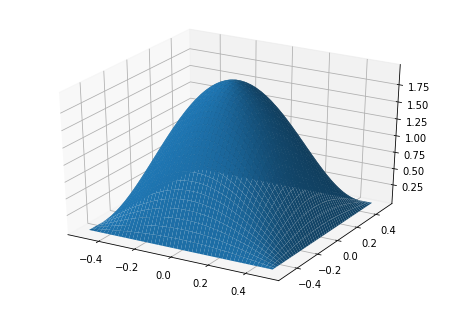

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x_grid, y_grid, true_psi_grid)

In [10]:
x_grid

array([[-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       ...,
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ]])

In [11]:
m = 1

In [12]:
T_diag_element = (2  / (h_x ** 2)) + (2 / (h_y ** 2))
T_non_diag = -1 / (h_x ** 2)

In [13]:
I_diag_element = 1 / (h_y ** 2)

In [14]:
T = numpy.zeros((Nx, Nx))
I = numpy.zeros_like(T)
for i in range(Nx):
    for j in range(Nx):
        if i == j:
            T[i][j] = T_diag_element
            I[i][j] = I_diag_element
        if abs(i - j) == 1:
            T[i][j] = T_non_diag

In [15]:
temp_matrix_1 = numpy.eye(Ny)
temp_matrix_2 = numpy.zeros((Ny, Ny))
for i in range(Ny):
    for j in range(Ny):
        if abs(i - j) == 1:
            temp_matrix_2[i][j] = 1

In [16]:
Z = numpy.kron(temp_matrix_1, T) + numpy.kron(temp_matrix_2, -I)
Z

array([[ 9604., -2401.,     0., ...,     0.,     0.,     0.],
       [-2401.,  9604., -2401., ...,     0.,     0.,     0.],
       [    0., -2401.,  9604., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,  9604., -2401.,     0.],
       [    0.,     0.,     0., ..., -2401.,  9604., -2401.],
       [    0.,     0.,     0., ...,     0., -2401.,  9604.]])

In [17]:
E, psi = scipy.linalg.eigh(Z)
#E = E.real
#psi = psi.real
psi

array([[ 0.00014862, -0.00038312,  0.00017102, ...,  0.00039324,
        -0.00014626, -0.00014862],
       [ 0.00029667, -0.00076358,  0.00033823, ..., -0.00078191,
         0.00029338,  0.00029667],
       [ 0.0004436 , -0.00113876,  0.00049792, ...,  0.00116154,
        -0.00044216, -0.0004436 ],
       ...,
       [ 0.0004436 ,  0.00113876, -0.00049792, ..., -0.00116154,
         0.00044216, -0.0004436 ],
       [ 0.00029667,  0.00076358, -0.00033823, ...,  0.00078191,
        -0.00029338,  0.00029667],
       [ 0.00014862,  0.00038312, -0.00017102, ..., -0.00039324,
         0.00014626, -0.00014862]])

In [18]:
min_energy_index = list(E).index(min(E))
print(calc_energy(1, 1))
E[min_energy_index]

19.739208802178716


18.215630809429403

In [19]:
#print(psi[min_energy_index])
psi_grid = psi[:, min_energy_index].reshape((Nx, Ny))
psi_grid

array([[0.00014862, 0.00029667, 0.0004436 , ..., 0.0004436 , 0.00029667,
        0.00014862],
       [0.00029667, 0.00059222, 0.00088552, ..., 0.00088552, 0.00059222,
        0.00029667],
       [0.0004436 , 0.00088552, 0.00132407, ..., 0.00132407, 0.00088552,
        0.0004436 ],
       ...,
       [0.0004436 , 0.00088552, 0.00132407, ..., 0.00132407, 0.00088552,
        0.0004436 ],
       [0.00029667, 0.00059222, 0.00088552, ..., 0.00088552, 0.00059222,
        0.00029667],
       [0.00014862, 0.00029667, 0.0004436 , ..., 0.0004436 , 0.00029667,
        0.00014862]])

In [20]:
psi

array([[ 0.00014862, -0.00038312,  0.00017102, ...,  0.00039324,
        -0.00014626, -0.00014862],
       [ 0.00029667, -0.00076358,  0.00033823, ..., -0.00078191,
         0.00029338,  0.00029667],
       [ 0.0004436 , -0.00113876,  0.00049792, ...,  0.00116154,
        -0.00044216, -0.0004436 ],
       ...,
       [ 0.0004436 ,  0.00113876, -0.00049792, ..., -0.00116154,
         0.00044216, -0.0004436 ],
       [ 0.00029667,  0.00076358, -0.00033823, ...,  0.00078191,
        -0.00029338,  0.00029667],
       [ 0.00014862,  0.00038312, -0.00017102, ..., -0.00039324,
         0.00014626, -0.00014862]])

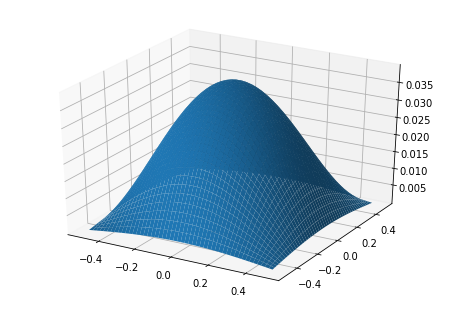

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x_grid, y_grid, psi_grid)